# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utility Functions</a></div><div class="lev1 toc-item"><a href="#MNIST" data-toc-modified-id="MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST</a></div><div class="lev2 toc-item"><a href="#Deep-Autoencoder" data-toc-modified-id="Deep-Autoencoder-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Deep Autoencoder</a></div><div class="lev2 toc-item"><a href="#Small-Autoencoder" data-toc-modified-id="Small-Autoencoder-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Small Autoencoder</a></div><div class="lev2 toc-item"><a href="#t-SNE" data-toc-modified-id="t-SNE-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>t-SNE</a></div><div class="lev1 toc-item"><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CIFAR10</a></div><div class="lev1 toc-item"><a href="#Denoising-Autoencoder" data-toc-modified-id="Denoising-Autoencoder-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Denoising Autoencoder</a></div>

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist, cifar10
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

# Utility Functions

In [22]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

# MNIST

## Deep Autoencoder

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [24]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_mnist = Model(input_img, output_img)
autoencoder_mnist.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_mnist.fit(x_train, x_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s - loss: 0.1416     
Epoch 2/3
60000/60000 [==============================] - 7s - loss: 0.0997     
Epoch 3/3
60000/60000 [==============================] - 8s - loss: 0.0935     


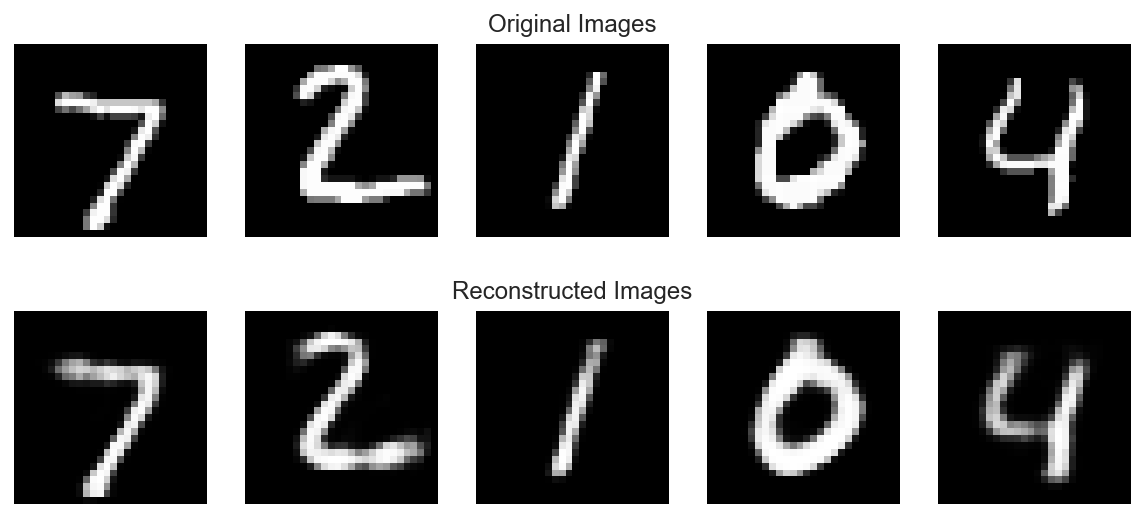

In [25]:
plot_autoencoder_outputs(autoencoder_mnist, 5, (28, 28))

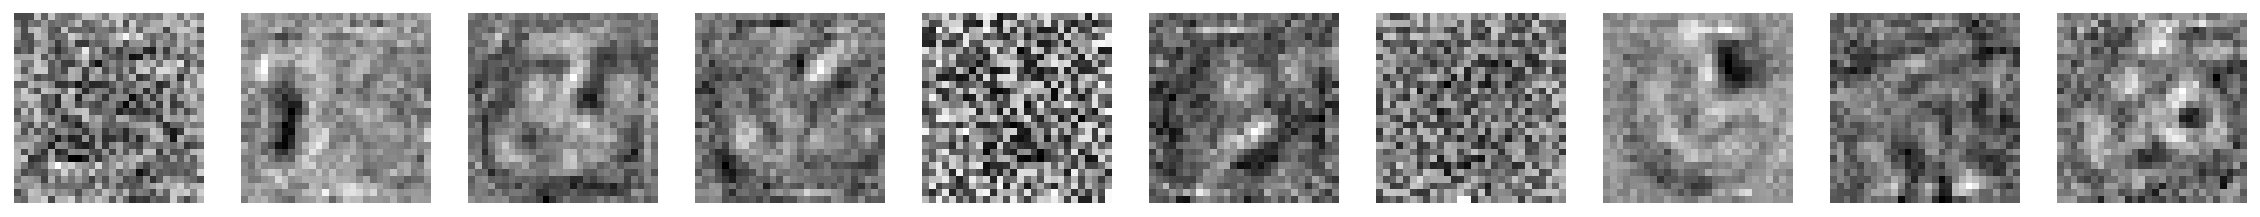

In [26]:
weights = autoencoder_mnist.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Small Autoencoder

In [11]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_mnist = Model(input_img, output_img)
autoencoder_mnist.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_mnist.fit(x_train, x_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s - loss: 0.1817     
Epoch 2/5
60000/60000 [==============================] - 4s - loss: 0.1421     
Epoch 3/5
60000/60000 [==============================] - 4s - loss: 0.1401     
Epoch 4/5
60000/60000 [==============================] - 4s - loss: 0.1393     
Epoch 5/5
60000/60000 [==============================] - 4s - loss: 0.1388     


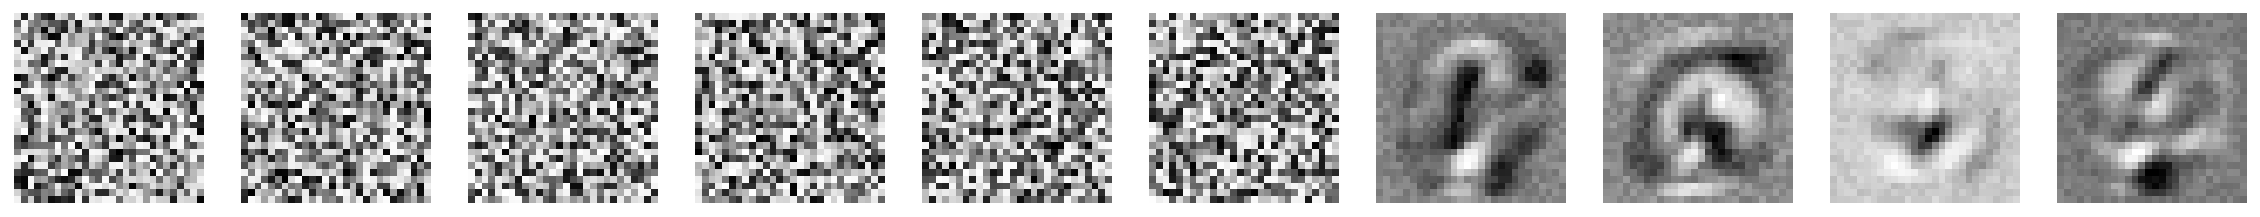

In [12]:
weights = autoencoder_mnist.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+20].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## t-SNE

In [22]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_mnist = Model(input_img, output_img)
autoencoder_mnist.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_mnist.fit(x_train, x_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s - loss: 0.1399     
Epoch 2/3
60000/60000 [==============================] - 6s - loss: 0.1015     
Epoch 3/3
60000/60000 [==============================] - 7s - loss: 0.0966     


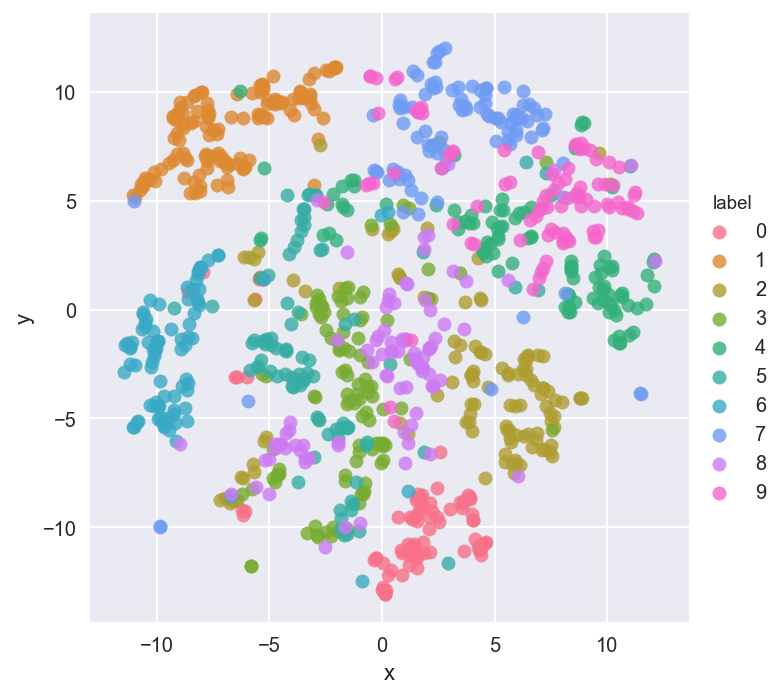

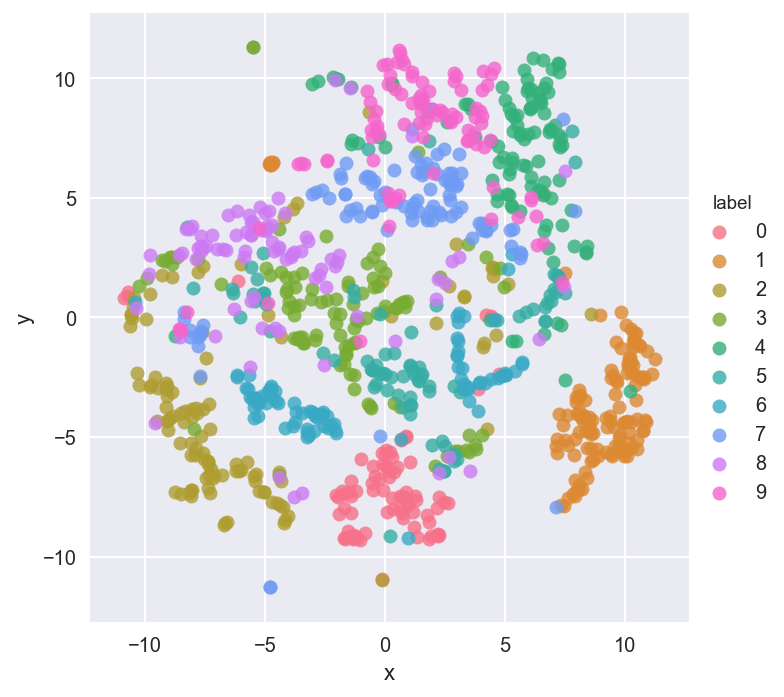

In [25]:
num = 1000
model = Model(input_img, code)
embeddings = model.predict(x_test)[:num]

model30 = TSNE(perplexity=30, learning_rate=300) 
tsne30 = model30.fit_transform(embeddings)

model50 = TSNE(perplexity=50, learning_rate=300) 
tsne50 = model50.fit_transform(embeddings)

# model100 = TSNE(perplexity=100, n_iter=400) 
# tsne100 = model100.fit_transform(embeddings)

# plots
plt.figure(figsize=(10, 10))
df = pd.DataFrame({'x':tsne30[:, 0], 'y':tsne30[:, 1], 'label':y_test[:num]})
sns.lmplot(x='x', y='y', data=df, hue='label', fit_reg=False) 

plt.figure(figsize=(10, 10))
df = pd.DataFrame({'x':tsne50[:, 0], 'y':tsne50[:, 1], 'label':y_test[:num]})
sns.lmplot(x='x', y='y', data=df, hue='label', fit_reg=False) 

# plt.figure(figsize=(10, 10))
# df = pd.DataFrame({'x':tsne100[:, 0], 'y':tsne100[:, 1], 'label':y_test[:num]})
# sns.lmplot(x='x', y='y', data=df, hue='label', fit_reg=False) 

# CIFAR10

In [76]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = x_train[:1000]
x_test = x_test[:1000]

print(x_train.shape)
print(x_test.shape)

(1000, 3072)
(1000, 3072)


In [77]:
input_size = 3072
hidden_size = 1024
code_size = 256

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_cifar10 = Model(input_img, output_img)
autoencoder_cifar10.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_cifar10.fit(x_train, x_train, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 2s - loss: 0.6787     
Epoch 2/10
1000/1000 [==============================] - 2s - loss: 0.6525     
Epoch 3/10
1000/1000 [==============================] - 2s - loss: 0.6408     
Epoch 4/10
1000/1000 [==============================] - 2s - loss: 0.6343     
Epoch 5/10
1000/1000 [==============================] - 2s - loss: 0.6241     
Epoch 6/10
1000/1000 [==============================] - 2s - loss: 0.6196     
Epoch 7/10
1000/1000 [==============================] - 2s - loss: 0.6177     
Epoch 8/10
1000/1000 [==============================] - 2s - loss: 0.6137     
Epoch 9/10
1000/1000 [==============================] - 2s - loss: 0.6094     
Epoch 10/10
1000/1000 [==============================] - 2s - loss: 0.6078     


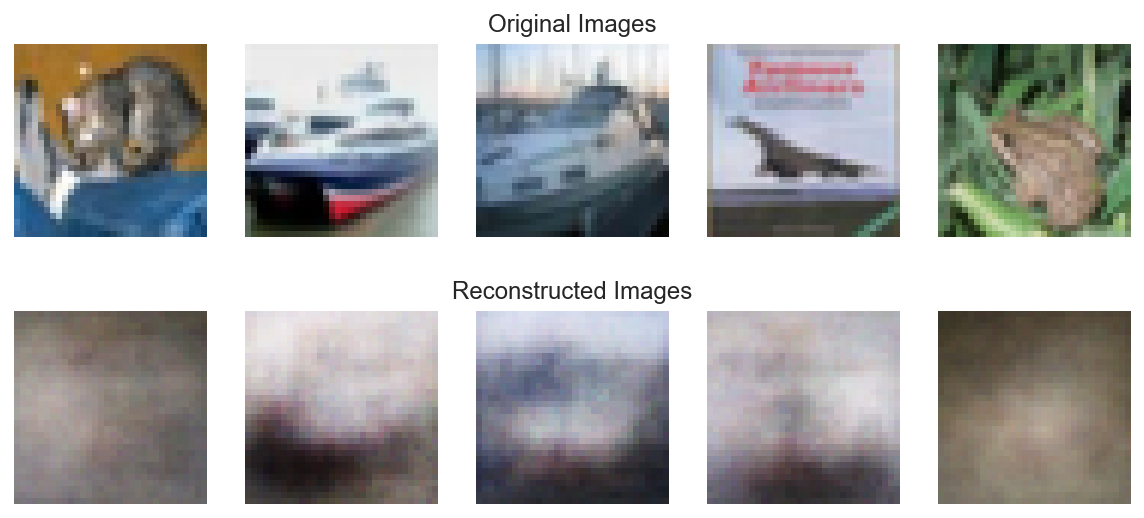

In [78]:
plot_autoencoder_outputs(autoencoder_cifar10, 5, (32, 32, 3))

# Denoising Autoencoder

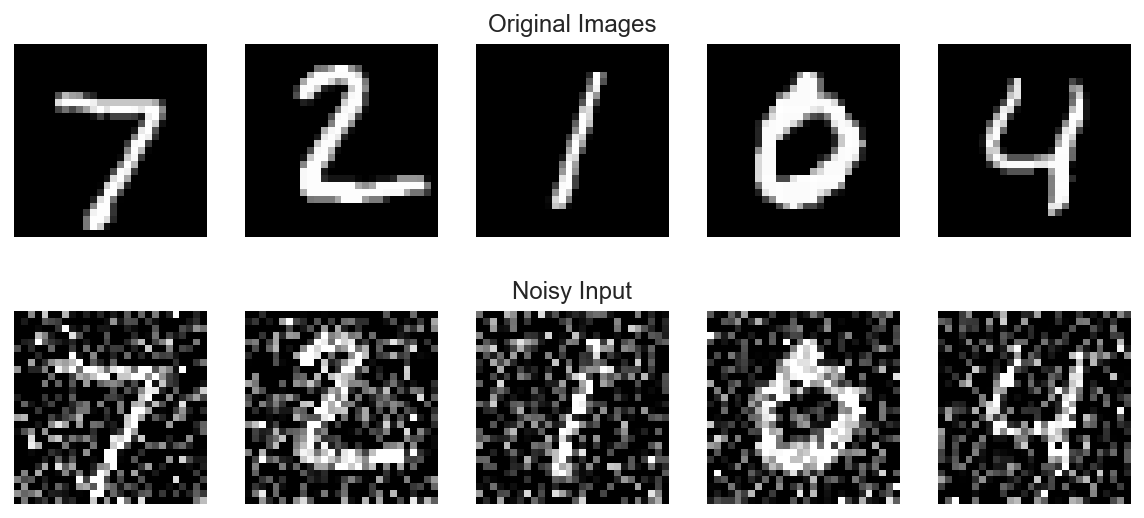

In [37]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [41]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_mnist = Model(input_img, output_img)
autoencoder_mnist.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_mnist.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s - loss: 0.1690     
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 0.1322     
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.1255     
Epoch 4/10
60000/60000 [==============================] - 8s - loss: 0.1222     
Epoch 5/10
60000/60000 [==============================] - 8s - loss: 0.1201     
Epoch 6/10
60000/60000 [==============================] - 7s - loss: 0.1187     
Epoch 7/10
60000/60000 [==============================] - 8s - loss: 0.1176     
Epoch 8/10
60000/60000 [==============================] - 8s - loss: 0.1166     
Epoch 9/10
60000/60000 [==============================] - 10s - loss: 0.1159    
Epoch 10/10
60000/60000 [==============================] - 8s - loss: 0.1151     


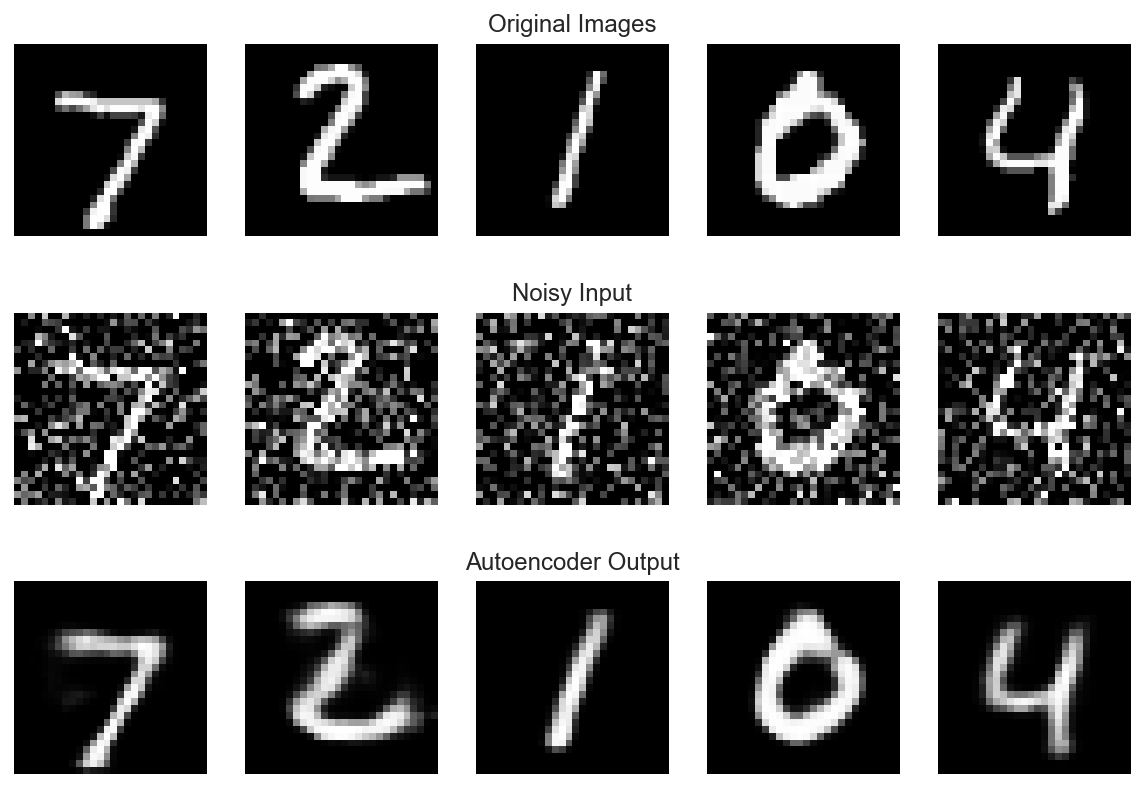

In [42]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder_mnist.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')